# Import data

In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import smogn


data_df = pd.read_csv('../data/old.csv')
pred_df = pd.read_csv('../data/crash_amounts.csv')

labels = list(data_df)[3:]
print(labels)

new_data_df = []

X = []
for index, row in pred_df.iterrows():
    relevant_x = data_df.loc[data_df['GISJOIN'] == row["GISJOIN"]]
    new_data_df.append([*relevant_x.values.flatten().tolist(),row['crash_amount']])
    X.append(relevant_x[labels].to_numpy().reshape(-1))
    

    
X = np.array(X)
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)
X = min_max_scaler.transform(X)
T = pred_df[["crash_amount"]].to_numpy()

new_data_df = pd.DataFrame(new_data_df, columns=[*list(data_df), 'crash_amount'])

['bachelors_degree', 'gini_index', 'median_household_income', 'median_age', 'white', 'black', 'native_american', 'asian', 'poverty', 'owned', 'occupied', 'avg_annual_pay', 'oty_annual_avg_estabs_pct_chg', 'oty_annual_avg_emplvl_pct_chg', 'oty_total_annual_wages_pct_chg', 'oty_taxable_annual_wages_pct_chg', 'oty_annual_contributions_pct_chg', 'oty_annual_avg_wkly_wage_pct_chg', 'oty_avg_annual_pay_pct_chg']


In [4]:
data_df

,GISJOIN,county_name,total,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,...,owned,occupied,avg_annual_pay,oty_annual_avg_estabs_pct_chg,oty_annual_avg_emplvl_pct_chg,oty_total_annual_wages_pct_chg,oty_taxable_annual_wages_pct_chg,oty_annual_contributions_pct_chg,oty_annual_avg_wkly_wage_pct_chg,oty_avg_annual_pay_pct_chg
0,G4800630,Camp County,12489,0.1550012725884449,0.448,44736.12,36.5,0.7938986307950997,0.16718712466970934,0.0023220433981904075,...,0.6458616010854816,0.8122703894195444,6866.301094890511,11.716240875912407,0.7213503649635036,1.113321167883212,-0.02427007299270081,-2.7644160583941595,0.49562043795620464,0.49689781021897794
1,G4801470,Fannin County,32884,0.1341053748231966,0.414,55998.36,39.9,0.8754409439240968,0.07511251672545918,0.0063860844179540206,...,0.7293723554301833,0.8324038743762842,7599.346381969158,16.209134045077114,-0.5359430604982202,1.4930011862396197,1.9160142348754459,0.6404507710557529,1.728469750889681,1.7256227758007134
2,G2201210,West Baton Rouge Parish,22323,0.16908346631513219,0.428,61360.200000000004,35.2,0.610088249787215,0.3493258074631546,0.001478295927966671,...,0.7425845021844102,0.9211055808535423,9369.228473019517,6.441791044776122,0.9362801377726744,2.21825487944891,0.8267508610792187,0.91894374282434,1.0195177956371988,1.021125143513203
3,G2600050,Allegan County,112817,0.19706893285339253,0.397,68419.56,37.7,0.9215011921962115,0.013322460267512874,0.004458547913878228,...,0.8355387072932313,0.8671104587459428,12128.511940298507,4.119776119402983,0.618134328358208,2.0975373134328335,0.852910447761194,2.5017910447761182,1.556492537313432,1.560597014925373
4,G5500890,Ozaukee County,85554,0.4220551553315076,0.448,97992.84000000001,42.3,0.9559225752156533,0.013734015943147018,0.0014844425742805713,...,0.7865398900609122,0.9451527746573803,15975.303052866717,5.643782576321666,1.0655994043186892,2.1597170513775112,1.2202531645569616,0.6797468354430368,1.0529411764705887,1.054728220402084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,G0800530,Hinsdale County,554,0.2066326530612245,0.414,70950,34.2,0.9494584837545126,0,0.036101083032490974,...,0.6666666666666666,0.12745098039215685,4325.923076923077,8.381623931623931,-0.4871794871794872,0.2658119658119658,0.666666666666667,-1.2623931623931628,1.6141025641025635,1.6029914529914524
3412,G4200150,Bradford County,61375,0.15578187688436246,0.42,51799.44,42.4,0.9750386965376782,0.0057841140529531565,0.0024928716904276988,...,0.7450268329096558,0.8410996097064314,9046.103574702109,7.542163153070586,1.1168652612282308,3.6206232813932195,0.7186067827681026,-0.3649862511457384,1.160219981668193,1.1621448212648933
3413,G3900390,Defiance County,38516,0.15081723625557206,0.398,59504.280000000006,39,0.9388825423200747,0.015526015162529858,0.004855125142797798,...,0.7865395913571382,0.9070400852625969,10278.242331288344,7.270961145194272,0.6972392638036808,2.4072597137014324,1.621676891615543,1.7088957055214729,1.1328220858895717,1.1303680981595094
3414,G5500410,Forest County,9764,0.11020589542290031,0.432,48081,43.6,0.8383859074149939,0.016591560835723065,0.11675542810323637,...,0.7441914498141264,0.48408502980542123,6204.43736730361,1.8004246284501062,-0.11847133757961764,0.23545647558386423,0.17133757961783433,0.5036093418259017,0.5055201698513796,0.4989384288747341


In [5]:
pred_df.sort_values(by='crash_amount', ascending=False)

,Unnamed: 0,county,GISJOIN,highest_price,lowest_price,crash_amount
229,229,Merced County,G0600470,373376.0,111317.0,0.701864
14,14,Wayne County,G2601630,157238.0,48176.0,0.693611
118,118,Stanislaus County,G0600990,425152.0,140078.0,0.670523
228,228,Clayton County,G1300630,130244.0,45161.0,0.653258
80,80,San Joaquin County,G0600770,460671.0,162641.0,0.646948
...,...,...,...,...,...,...
343,343,Ouachita Parish,G2200730,123592.0,119586.0,0.032413
661,661,Holmes County,G3900750,138185.0,133889.0,0.031089
671,671,Tioga County,G4201170,108619.0,105557.0,0.028190
871,871,Saunders County,G3101550,148062.0,145762.0,0.015534


In [6]:
X.shape, T.shape

((1066, 19), (1066, 1))

In [7]:
X_train, X_test, T_train, T_test = train_test_split(X,T,test_size=0.25)
X_train.shape, X_test.shape, T_train.shape, T_test.shape

((799, 19), (267, 19), (799, 1), (267, 1))

# Correlations

In [8]:
corr_thing = pd.DataFrame(list(np.hstack((T.reshape(-1,1),X))), columns=["target",*labels])
corr_thing.corr()

,target,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,asian,poverty,owned,occupied,avg_annual_pay,oty_annual_avg_estabs_pct_chg,oty_annual_avg_emplvl_pct_chg,oty_total_annual_wages_pct_chg,oty_taxable_annual_wages_pct_chg,oty_annual_contributions_pct_chg,oty_annual_avg_wkly_wage_pct_chg,oty_avg_annual_pay_pct_chg
target,1.000000,0.102033,0.011995,0.204317,-0.050589,-0.211397,0.064692,0.020948,0.216522,-0.104923,-0.069584,-0.030849,0.315393,0.258652,0.226192,0.019612,0.161088,0.034840,0.136636,0.137004
bachelors_degree,0.102033,1.000000,0.122554,0.765688,-0.192640,-0.015036,-0.129906,-0.090011,0.499943,-0.560311,-0.213299,0.259046,0.734697,0.180920,0.350610,-0.027709,0.323984,0.029450,0.332476,0.333453
gini_index,0.011995,0.122554,1.000000,-0.339850,-0.048695,-0.399567,0.387136,-0.006722,0.068336,0.524108,-0.500854,-0.176396,0.230965,-0.039679,0.068833,-0.049542,0.061314,0.033912,0.109845,0.110247
median_household_income,0.204317,0.765688,-0.339850,1.000000,-0.106038,0.119860,-0.275016,-0.105108,0.487920,-0.823738,0.157731,0.366485,0.594860,0.227542,0.305074,0.019408,0.284913,0.052690,0.238399,0.239099
median_age,-0.050589,-0.192640,-0.048695,-0.106038,1.000000,0.363078,-0.213022,-0.037575,-0.229219,-0.154721,0.518069,-0.435612,-0.251313,-0.137195,-0.204404,-0.013681,-0.170968,-0.037600,-0.172279,-0.172526
white,-0.211397,-0.015036,-0.399567,0.119860,0.363078,1.000000,-0.866700,-0.113131,-0.312414,-0.416659,0.533854,-0.026406,-0.210107,-0.061287,-0.137719,-0.020908,-0.112502,-0.033815,-0.057409,-0.057666
black,0.064692,-0.129906,0.387136,-0.275016,-0.213022,-0.866700,1.000000,-0.123173,-0.047877,0.476322,-0.363955,-0.045915,-0.008918,-0.073566,-0.045334,0.027787,-0.039552,0.015284,-0.081731,-0.081808
native_american,0.020948,-0.090011,-0.006722,-0.105108,-0.037575,-0.113131,-0.123173,1.000000,-0.027763,0.119649,-0.009947,-0.120978,-0.089292,0.084328,0.040492,-0.005250,0.005013,0.014881,0.037928,0.037887
asian,0.216522,0.499943,0.068336,0.487920,-0.229219,-0.312414,-0.047877,-0.027763,1.000000,-0.264372,-0.339130,0.236704,0.589766,0.194349,0.378897,-0.001161,0.346116,0.052261,0.283112,0.283805
poverty,-0.104923,-0.560311,0.524108,-0.823738,-0.154721,-0.416659,0.476322,0.119649,-0.264372,1.000000,-0.361877,-0.264666,-0.395042,-0.151626,-0.190335,-0.016968,-0.190044,-0.029170,-0.168423,-0.168904


# Linear Regression

In [9]:
linreg = LinearRegression()
linreg.fit(X_train,T_train)
# linreg.score(X_train,T_train)

LinearRegression()

In [10]:
Y_train = linreg.predict(X_train)
rmse_train = np.sqrt(np.mean((Y_train-T_train)**2))
print(f"Train RMSE: {rmse_train}")

Y_test = linreg.predict(X_test)
rmse_test = np.sqrt(np.mean((Y_test-T_test)**2))
print(f"Test RMSE: {rmse_test}")

Train RMSE: 0.10470907721529185
Test RMSE: 0.11277857578478587


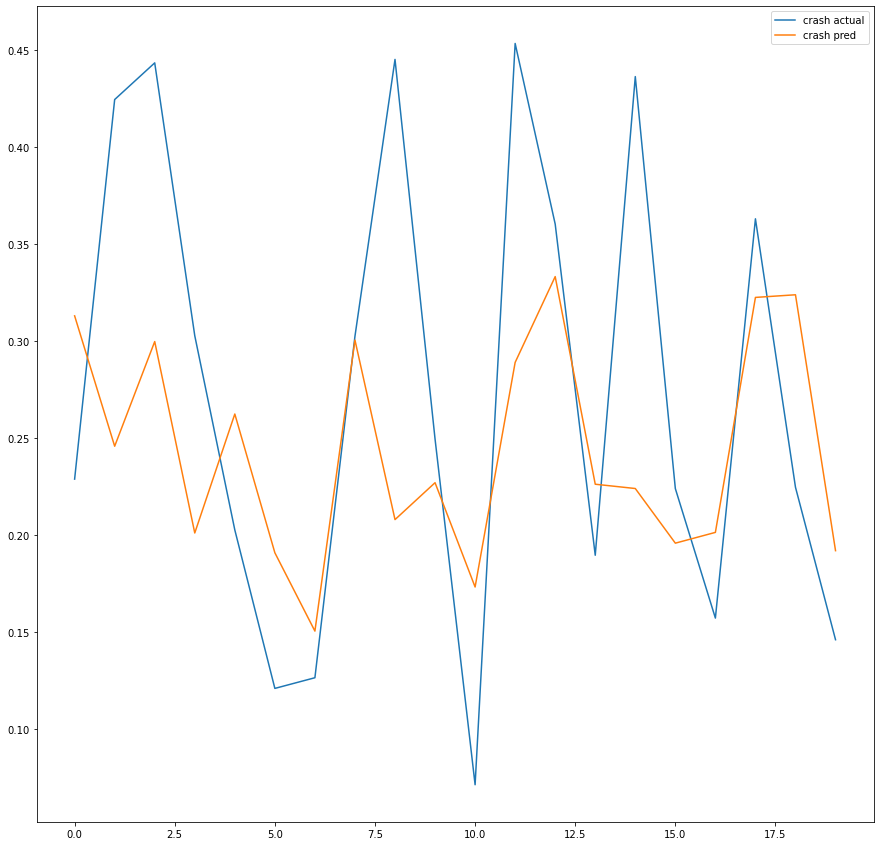

In [11]:
plt.figure(figsize=(15,15))
plt.plot(T_test[:20], label="crash actual")
plt.plot(Y_test[:20], label="crash pred")
plt.legend()

Its really bad at extreme values.

In [12]:
pd.DataFrame(linreg.coef_, columns=labels)

,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,asian,poverty,owned,occupied,avg_annual_pay,oty_annual_avg_estabs_pct_chg,oty_annual_avg_emplvl_pct_chg,oty_total_annual_wages_pct_chg,oty_taxable_annual_wages_pct_chg,oty_annual_contributions_pct_chg,oty_annual_avg_wkly_wage_pct_chg,oty_avg_annual_pay_pct_chg
0,-0.287738,-0.004381,0.252687,0.053001,-0.427398,-0.323663,-0.221823,-0.375642,0.021079,0.063217,-0.195727,0.346374,0.164134,0.148343,0.006153,-0.12323,0.136848,9.518206,-9.386526


In [13]:
linreg.intercept_

array([0.54297039])

# Get predictions for 2020

In [15]:
to_predict_df = pd.read_csv('../data/now.csv')

X_to_predict = to_predict_df[labels].to_numpy()
min_max_scaler_pred = MinMaxScaler()
min_max_scaler_pred.fit(X_to_predict)
X_to_predict = min_max_scaler.transform(X_to_predict)

results = linreg.predict(X_to_predict)

# now write results

to_predict_df["crash_amount"] =  results 

to_predict_df

import json

with open('../frontend/data.json') as f:
    shape_data = json.load(f)
    
to_write = []

old_features = shape_data['features'] if not isinstance(shape_data, list) else shape_data

for old_feature in old_features:
    gisjoin = old_feature['properties']['GISJOIN']
    result = to_predict_df.loc[to_predict_df['GISJOIN'] == gisjoin].T.to_dict()
    if not len(list(result.keys())):
        continue
    result = result[list(result.keys())[0]]
    old_feature['properties'] = {**old_feature['properties'], **result}
    to_write.append(old_feature)

with open('../frontend/data.json', 'w') as jsonfile:
    json.dump(to_write, jsonfile)

ValueError: could not convert string to float: 'bachelors_degree'

# Where got worse?

In [60]:
sig = []
for index, pred_2007_row in new_data_df.iterrows():
    gisjoin = pred_2007_row['GISJOIN']
    crash_amount_old = pred_2007_row['crash_amount']
    pred_2020_row = to_predict_df.loc[to_predict_df['GISJOIN'] == gisjoin]
    if not len(list(pred_2020_row.keys())):
        continue
    crash_amount_new = pred_2020_row['crash_amount'].values[0]
    difference = crash_amount_new - crash_amount_old
    
    if difference > 0.2:
        siga = [pred_2007_row['GISJOIN'], pred_2007_row['county_name'], crash_amount_old, crash_amount_new]
        sig.append(siga)

more_risk_df = pd.DataFrame(sig, columns=["GISJOIN", "County Name", "Old Crash Amount", "New Crash Amount"])
more_risk_df

,GISJOIN,County Name,Old Crash Amount,New Crash Amount
0,G1500030,Honolulu County,0.153312,0.558846
1,G4801570,Fort Bend County,0.074927,0.298985
2,G1800890,Lake County,0.066324,0.285226
3,G1500090,Maui County,0.259585,0.590828
4,G0201700,Matanuska-Susitna Borough,0.085543,0.315768
5,G4800210,Bastrop County,0.067478,0.383696
6,G1500070,Kauai County,0.151019,0.585747
7,G5300170,Douglas County,0.168580,0.406902
8,G2500070,Dukes County,0.105279,0.333350
9,G4000950,Marshall County,0.092288,0.377388


# Deep Learning

Let's just try deep learning for fun.

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
model = keras.Sequential(
    [
        keras.Input(shape=(11,)),
        layers.Dense(64, activation="relu", name="layer1"),
        layers.Dense(256, activation="relu", name="layer2"),
        layers.Dense(64, activation="relu", name="layer3"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                768       
                                                                 
 layer2 (Dense)              (None, 256)               16640     
                                                                 
 layer3 (Dense)              (None, 64)                16448     
                                                                 
 out (Dense)                 (None, 1)                 65        
                                                                 
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________


In [38]:
n_epochs = 50
history1 = model.fit(X_train, T_train, batch_size=16, epochs=n_epochs, verbose=1, validation_data=(X_test,T_test))

Epoch 1/50
50/50 [==============================] - 1s 5ms/step - loss: 0.0184 - val_loss: 0.0130
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0133
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.0121
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0152
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.0109
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.0103
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.0104
Epoch 8/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.0110
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0121
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0111
Epoch 11/50
50/50 [

In [39]:
Y_train = model.predict(X_train)
Y_test = model.predict(X_test)

In [40]:
Y_train = linreg.predict(X_train)
rmse_train = np.sqrt(np.mean((Y_train-T_train)**2))
print(f"Train RMSE: {rmse_train}")

Y_test = linreg.predict(X_test)
rmse_test = np.sqrt(np.mean((Y_test-T_test)**2))
print(f"Test RMSE: {rmse_test}")

Train RMSE: 0.11432939337968083
Test RMSE: 0.10915161130517828


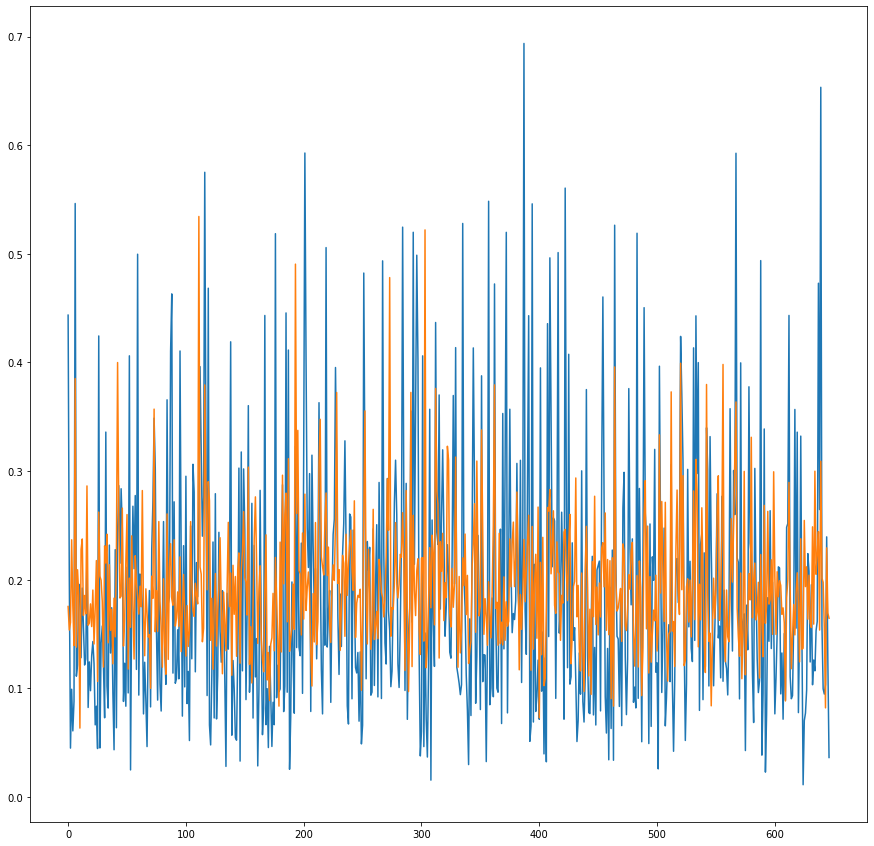

In [16]:
plt.figure(figsize=(15,15))
plt.plot(T_test)
plt.plot(Y_test);

In [18]:
Y_test.mean()

0.3314611687189681